images: 100%|██████████| 4229/4229 [01:41<00:00, 41.59it/s]


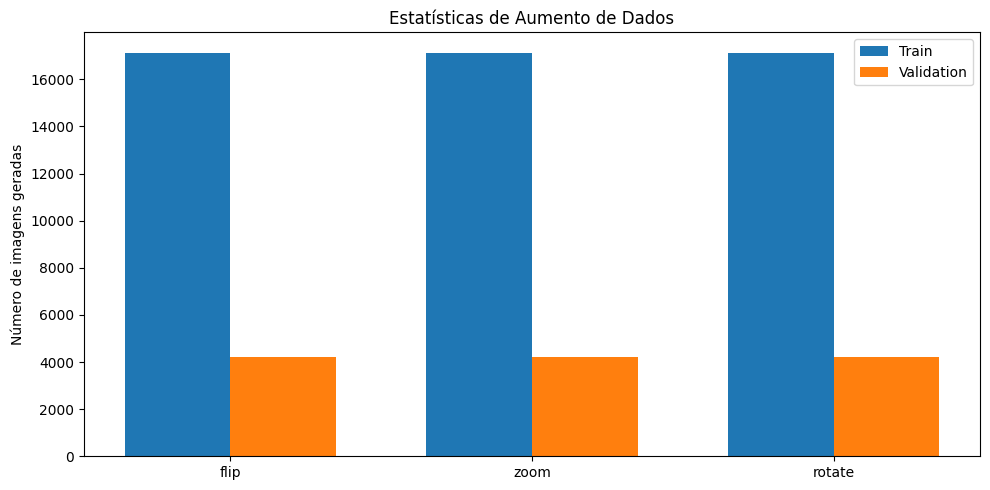

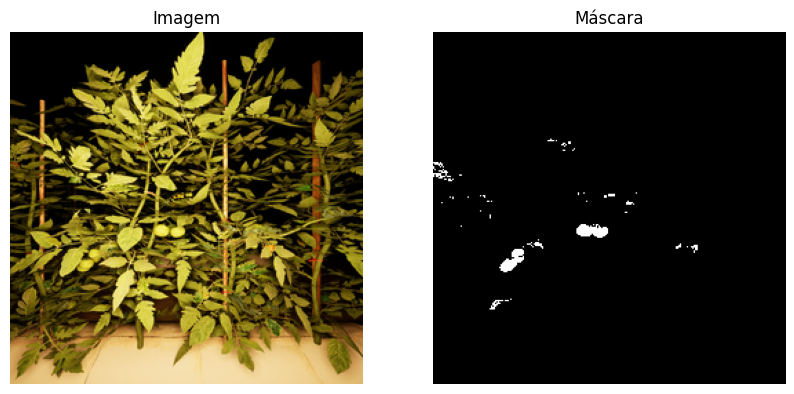

In [1]:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import albumentations as A

# Caminho raiz
BASE_DIR = r"C:\Mestrado\Materias\pesquisa\tomates\tomatotest\processed_data_256_augumentation"

# Definir transformações de aumento (sem alteração de cor)
transformations = [
    # Espelhamento horizontal da imagem
    ("flip", A.HorizontalFlip(p=1.0)),
    # Zoom aleatório (aumenta ou diminui a escala da imagem)
    ("zoom", A.RandomScale(scale_limit=0.3, p=1.0)),
    # Rotação aleatória dentro de um limite de 45 graus
    ("rotate", A.Rotate(limit=45, p=1.0))
]

# Aplicar aumento de dados
def augment_images(images_dir, masks_dir, save=True):
    image_files = sorted(os.listdir(images_dir))
    stats = {name: 0 for name, _ in transformations}

    for file in tqdm(image_files, desc=os.path.basename(images_dir)):
        image_path = os.path.join(images_dir, file)
        mask_path = os.path.join(masks_dir, file)

        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        for name, aug in transformations:
            augmented = aug(image=image, mask=mask)
            aug_img = augmented["image"]
            aug_mask = augmented["mask"]

            if save:
                new_img_name = file.replace('.png', f'_{name}.png')
                new_mask_name = file.replace('.png', f'_{name}.png')
                cv2.imwrite(os.path.join(images_dir, new_img_name), aug_img)
                cv2.imwrite(os.path.join(masks_dir, new_mask_name), aug_mask)

            stats[name] += 1
    return stats

# Aplicar em treino e validação
train_img_dir = os.path.join(BASE_DIR, "train", "images")
train_mask_dir = os.path.join(BASE_DIR, "train", "masks")
val_img_dir = os.path.join(BASE_DIR, "validation", "images")
val_mask_dir = os.path.join(BASE_DIR, "validation", "masks")

stats_train = augment_images(train_img_dir, train_mask_dir)
stats_val = augment_images(val_img_dir, val_mask_dir)

# Mostrar estatísticas
def plot_stats(stats_train, stats_val):
    labels = list(stats_train.keys())
    train_counts = list(stats_train.values())
    val_counts = list(stats_val.values())

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(10,5))
    plt.bar(x - width/2, train_counts, width, label='Train')
    plt.bar(x + width/2, val_counts, width, label='Validation')
    plt.xticks(x, labels)
    plt.ylabel("Número de imagens geradas")
    plt.title("Estatísticas de Aumento de Dados")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_stats(stats_train, stats_val)

# Mostrar exemplo visual
def show_example(img_dir, mask_dir, base_name):
    image = cv2.imread(os.path.join(img_dir, base_name))
    mask = cv2.imread(os.path.join(mask_dir, base_name), cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Imagem")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray')
    plt.title("Máscara")
    plt.axis("off")
    plt.show()

# Exibir um exemplo qualquer
augmented_files = [f for f in os.listdir(train_img_dir) if '_flip' in f]
if augmented_files:
    show_example(train_img_dir, train_mask_dir, augmented_files[0])
